### **Saudi Arabia Used Cars**

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing

****

### **Business Problem Understanding**

**Context**

The Saudi Green Initiative (SGI) is a national effort led by His Royal Highness Prince Mohammed bin Salman bin Abdulaziz, Crown Prince and Prime Minister, to combat climate change and enhance the environment. Launched in 2021, SGI aims to achieve net zero emissions by 2060 through a Circular Carbon Economy approach, while also promoting a green economy. SGI focuses on reducing emissions, increasing afforestation, and protecting land and sea areas.

**Trade Your Car to Electric Vehicle Program**

Aligned with the Saudi Green Initiative's emissions reduction objective, a key strategy is encouraging individuals to swap their conventional gasoline cars for electric vehicles (EVs). This initiative dovetails with the broader goal of transitioning towards a sustainable, low-carbon future. 

Under this program, the government purchases used cars from citizens at market price + 50%, using the proceeds to acquire EVs for participants. This incentivizes the shift to EVs, significantly reducing transportation emissions while promoting clean energy and automotive innovation. 

**Problem Statement**

A significant hurdle to EV adoption is their high pricing. To mitigate this, the government plans to subsidize by buying used cars and exchanging them for EVs, offering a 50% premium above market value. However, determining accurate market prices is challenging due to various factors, such as vehicle condition, age, brand, and etc. 

The government aims for fair and competitives pricing strategy to ensure program success and equitable buyback processes, enabling effective and fair operation for all community. 

**Goals**

Given these challenges, the Saudi government requires a tool to predict and assist individuals in determining appropriate prices for their used cars. Variances in features like engine type, manufacturing year, brand, vehicle type, and mileage can enhance buyback price accuracy, ensuring program success.

Accurate price predictions are crucial for program success. When predicted prices closely align with market rates, participation in the buyback or trade-in program for EVs hopefully will increases. Moreover, fair price predictions build trust in the government's execution of the program, also fostering increased participation.

**Analytic Approach**

Therefore, our task is to analyze data to identify patterns among the existing features that differentiate one used car from another.

Subsequently, this pattern will be used to develop a regression model to assist the user (Saudi Arabian government) in providing a prediction tool for purchasing prices of used cars, which will be instrumental in implementing the buyback program.

**Metric Evaluation**

We prioritize MSE to ensure the model accommodates most of car used by Saudi Arabia population, aiming for inclusive predictions. While RMSE, R2, and MAPE indicator will also be important, we want to maintain MSE score as minimal as possible to make sure the predictive part is fair for most of the Saudi people.

RMSE that emphasize on outlier will not be as effective as MSE in predicting most of Saudi people car that had not have a change to afford the sport cars or the classic car. 


### **Data Understanding**

In [23]:
#import relevant library
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [24]:
df = pd.read_csv('data_saudi_used_cars.csv')
pd.DataFrame({
    'column': df.columns.values,
    'type': df.dtypes.values,
    'n_unique': df.nunique().values,
    'min': df.min().values,
    'max': df.max().values,
    'sample_unique': [df[col].unique() for col in df.columns]
})

,column,type,n_unique,min,max,sample_unique
0,Type,object,347,2,ِACTIS V80,"[Corolla, Yukon, Range Rover, Optima, FJ, CX3,..."
1,Region,object,27,Abha,Yanbu,"[Abha, Riyadh, Hafar Al-Batin, Aseer, Makkah, ..."
2,Make,object,58,Aston Martin,Škoda,"[Toyota, GMC, Land Rover, Kia, Mazda, Porsche,..."
3,Gear_Type,object,2,Automatic,Manual,"[Manual, Automatic]"
4,Origin,object,4,Gulf Arabic,Unknown,"[Saudi, Gulf Arabic, Other, Unknown]"
5,Options,object,3,Full,Standard,"[Standard, Full, Semi Full]"
6,Year,int64,50,1963,2022,"[2013, 2014, 2015, 2020, 2019, 2012, 2016, 199..."
7,Engine_Size,float64,71,1.0,9.0,"[1.4, 8.0, 5.0, 2.4, 4.0, 2.0, 4.8, 3.5, 4.6, ..."
8,Mileage,int64,1716,100,20000000,"[421000, 80000, 140000, 220000, 49000, 25000, ..."
9,Negotiable,bool,2,False,True,"[True, False]"


- Dataset contain used cars prize in Saudi Arabia

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Type | Object | Type of used car |
| Region | Object | The region in which the used car was offered for sale |
| Make | Object | The company name |
| Gear_Type | Object | Gear type size of used car |
| Origin | Object | Origin of used car |
| Option | Object |  Options of used car |
| Year | Integer | Manufacturing year |
| Engine_Size | Float | The engine size of used car |
| Mileage | Object | Mileage of used car |
| Negotiable | Object | True if the price is 0, that means it is negotiable |
| Price | Integer |Used car price |

<br>

### **Data Condition**

In [25]:
# missing value
pd.DataFrame({'null': [df[col].isna().sum() for col in df.columns]}, index=df.columns.values)

,null
Type,0
Region,0
Make,0
Gear_Type,0
Origin,0
Options,0
Year,0
Engine_Size,0
Mileage,0
Negotiable,0


There are no missing value in the df so it is safe to run a model

In [26]:
# duplicated data
print(f"The amount of duplicate data: {df[df.duplicated()].shape}")
df[df.duplicated()]

The amount of duplicate data: (4, 11)


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
953,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,False,25000
4646,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,False,72910
4933,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,False,45000
5267,Camry,Riyadh,Toyota,Automatic,Saudi,Full,2013,2.5,185000,True,0


In [27]:
# remove the duplicates from df
df.drop_duplicates(keep='last', inplace=True, ignore_index=True)

We remove duplicate data from our dataframe to make ml model efficient

In [28]:
# distribution of the data

df.describe() 

,Year,Engine_Size,Mileage,Price
count,5620.000000,5620.000000,5.620000e+03,5620.000000
mean,2014.100356,3.296299,1.509222e+05,53086.404448
std,5.793003,1.515253,3.829633e+05,70175.153207
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.960000e+05,73000.000000
max,2022.000000,9.000000,2.000000e+07,850000.000000


In [29]:
df.describe(include='object')

,Type,Region,Make,Gear_Type,Origin,Options
count,5620,5620,5620,5620,5620,5620
unique,347,27,58,2,4,3
top,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full
freq,269,2270,1430,4871,4184,2232


It seems that our data have a many skewed numerical column

r:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
r:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
r:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
r:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

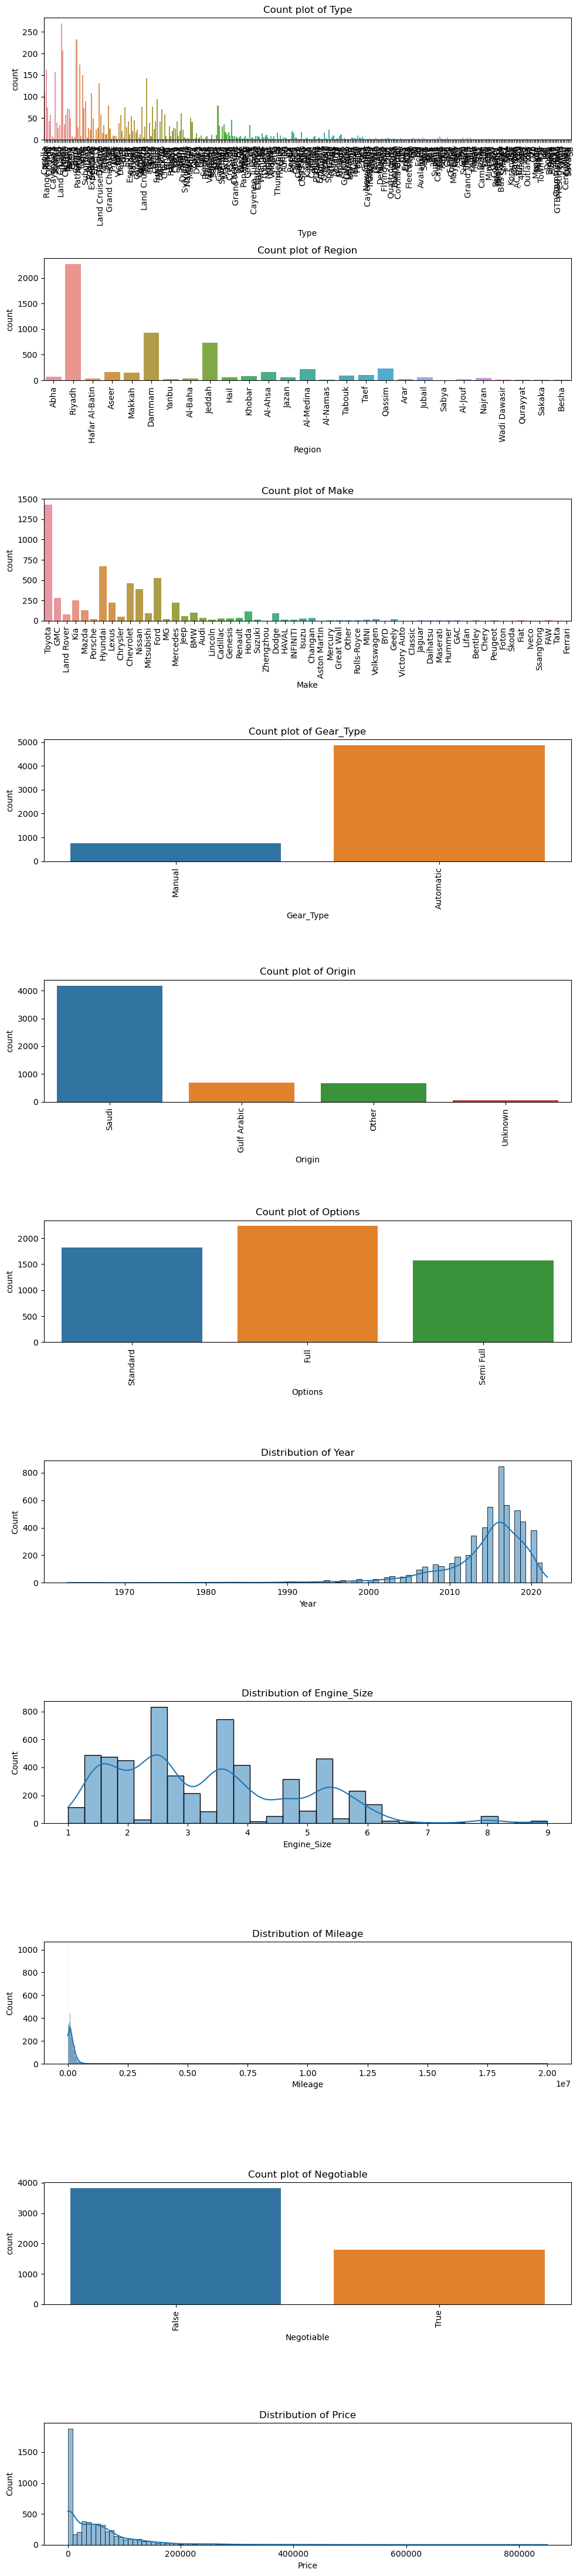

In [30]:
def plot_distributions(df):
    # Set up the matplotlib figure
    fig, axes = plt.subplots(len(df.columns), 1, figsize=(10, len(df.columns) * 4))

    for i, column in enumerate(df.columns):
        if df[column].dtype in ['float64', 'int64']:  # Numerical columns
            sns.histplot(df[column], ax=axes[i], kde=True)
            axes[i].set_title(f'Distribution of {column}')
        else:  # Categorical columns
            sns.countplot(x=df[column], ax=axes[i])
            axes[i].set_title(f'Count plot of {column}')
            axes[i].tick_params(axis='x', rotation=90)  # Rotate x labels if needed

    plt.tight_layout()
    plt.show()

plot_distributions(df)


In [1]:
raretype = pd.DataFrame(df['Type'].value_counts(normalize=True) * 100).round(2).head(100)
raretype

NameError: name 'pd' is not defined

In [ ]:
raremake = pd.DataFrame(df['Make'].value_counts(normalize=True) * 100).round(2).head(100)
raremake

After we check the distribution of the data and rarity label, we should also check the distribution of the data in relation to the price variable. We want to see the relation of either numerical or categorical variable to the data. 

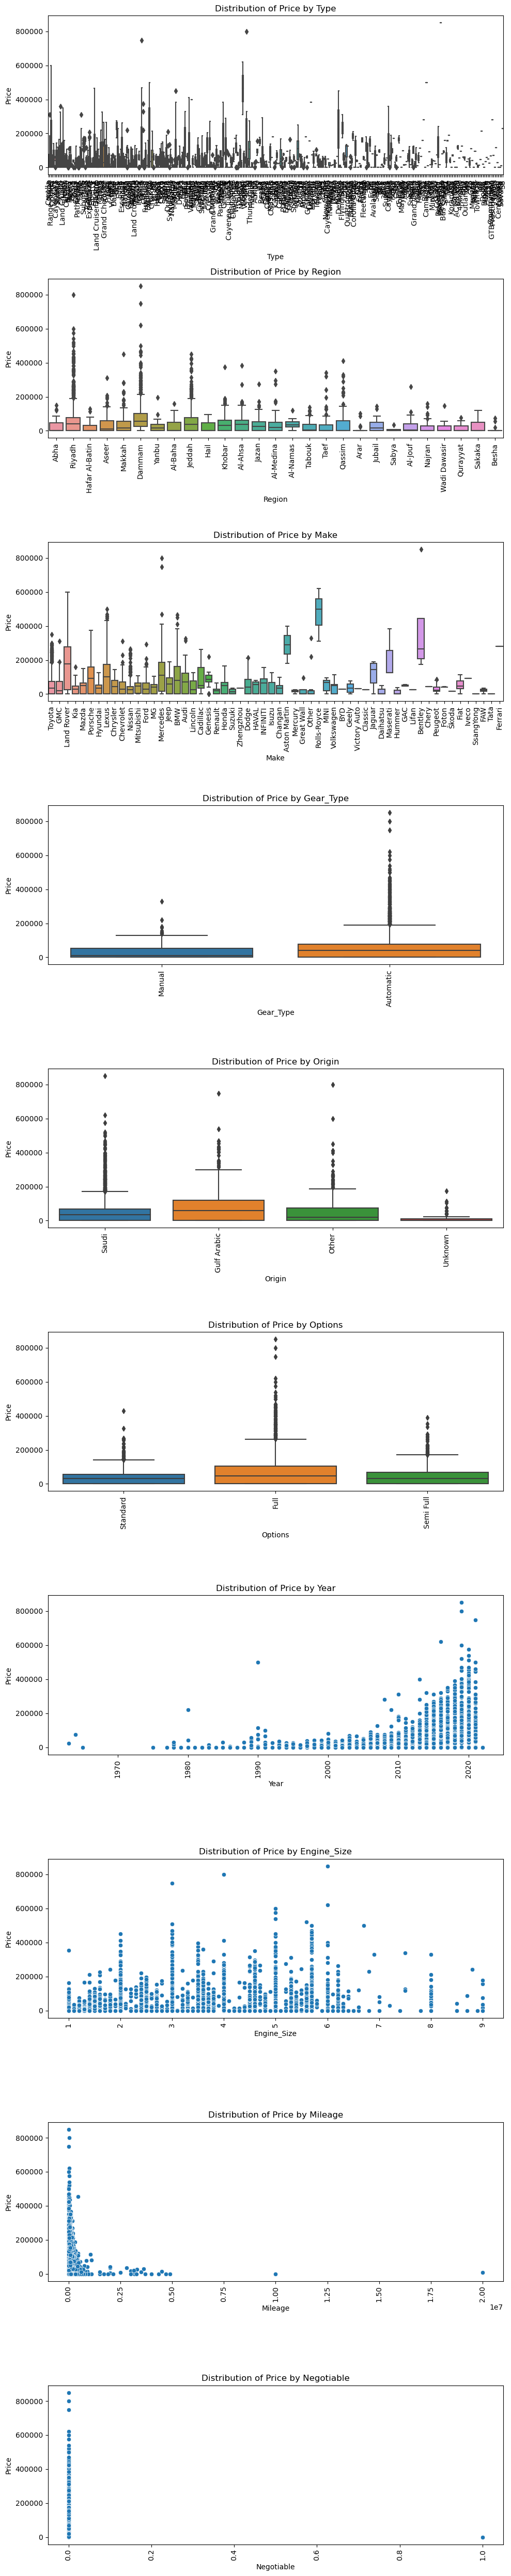

In [31]:
# cek the distribution of data in relation to price
def plot_distributions(df, target_column):
    columns_to_plot = df.columns.drop(target_column)

    fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(10, len(columns_to_plot) * 5))

    for i, column in enumerate(columns_to_plot):
        if df[column].dtype == 'object':
            # Create a boxplot for categorical columns
            sns.boxplot(x=df[column], y=df[target_column], ax=axes[i])
        else:
            # Create a scatter plot for numerical columns
            sns.scatterplot(x=df[column], y=df[target_column], ax=axes[i])

        axes[i].set_title(f'Distribution of {target_column} by {column}')
        axes[i].tick_params(axis='x', rotation=90)  # Rotate x labels if needed

    plt.tight_layout()
    plt.show()

plot_distributions(df, 'Price')


### **Summary of Feature Engineering**

1. Feature Selection

- minimizing ML bias

For this case, we will not be using Region Feature. We want to minimize the bias of where the car is sold. If we look at the Region column closely, for example, The Riyadh Car is more expensive rather than the car sold in any parts of Saudi Arabia. We do not want this to happen since we want to estabilish a single price for every car sold in every Saudi. 

- using selection

This case have many high cardinality column. This rise a few problem in relation of capability of model, such as model overfitting. Because of that, we will use some selection methode to choose which encoded feature that wuill be used. This will be used in **experiment 2** & **experiment 4** 

2. Feature Engineering

We will combine several columns to make model learn and understand the relation and the intersection of the feature that we feel would be helpful for better model prediction. This will be used in **experiment 3** & **experiment 4** . For example:

- df[Wear and Tear] = df.mileage * df.age This feature emphasize of how much the car is wear and tear in relation to the price of those car